In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
class MyPCA():
    
    def __init__(self, n_components=3):
        self.n_components = n_components
    
    def fit_transform(self, X):
        #X = X.transform(lambda x: x - x.mean())
        cov = np.cov(X.T)
        l, v = np.linalg.eigh(cov)
        v = v.transpose()
        l = pd.Series(l)
        l = l.sort_values(ascending=False)
        l_val = l
        l = l[:self.n_components].index
        w = np.zeros((len(l), len(X.columns)))
        for i in range(len(l)):
            w[i,:] = v[l[i],:]
        w = w.transpose()
        X_reduced = np.dot(X, w)
        df1 = pd.DataFrame(data=X_reduced)
        return (df1, w[:,0], l_val)

In [10]:
def normalize(df):
    df = df.to_numpy()
    arr = df.transpose()
    new = np.zeros_like(arr)
    for i in range(arr.shape[0]):
        new[i,:] = (arr[i,:] - np.mean(arr[i,:])) / np.std(arr[i,:])
    new_transpose = new.transpose()
    res = pd.DataFrame(data=new_transpose)
    return res

[-0.3589099 -0.3589099]
доля сохраненной дисперсии 0.8650885684768527
главная компонента [0.70710678 0.70710678]


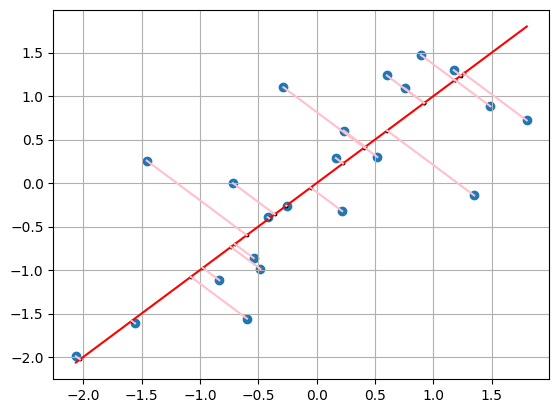

In [19]:
df1 = pd.read_csv('ex_pca_data1.csv', names=['x1', 'x2'])
df = normalize(df1)
plt.scatter(df[0], df[1])
plt.grid(True)
model = MyPCA(n_components=1)
X, v1, l = model.fit_transform(df)
x = np.linspace(min(df[0]), max(df[0]), 50)
f = lambda x: (v1[1] / v1[0]) * x
plt.plot(x, f(x), color='r')
new = np.dot(df, v1)
Z = np.dot(X, np.array([v1]))
print(Z[0,:])
#print(Z)
#X = X.to_numpy()
for i in range(Z.shape[0]):
    plt.scatter(Z[i][0], Z[i][0], color='black', s=3)
#plt.scatter(Z[:,0], Z[:,1], color = 'black', s=6)
for i in range(len(df)):
    plt.plot([df.iloc[i, 0], Z[i][0]], [df.iloc[i, 1], Z[i][1]], color='pink')
print(f'доля сохраненной дисперсии {l[1] / sum(l)}')
print(f'главная компонента {v1}')